In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
archivo = './StudentPerformanceFactors.csv'
student_performance = pd.read_csv(archivo)
student_performance.shape

(6607, 20)

In [3]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
student_performance.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Las siguientes variables poseen datos faltantes:

    * Distance_from_Home
    * Parental_Education_Level
    * Teacher_Quality

Tambien se observa que la variable "Exam_Score" posee un valor inusual de 101


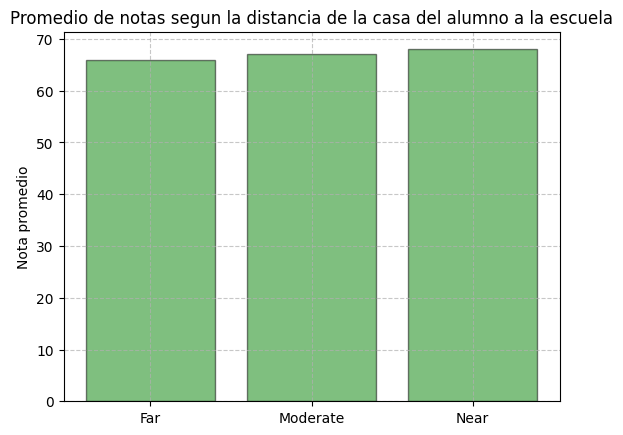

In [5]:
distance_from_home_mean_exam_score = (student_performance.groupby('Distance_from_Home',as_index=False)['Exam_Score'].mean().round()).sort_values(by='Exam_Score')
plt.bar(distance_from_home_mean_exam_score['Distance_from_Home'],distance_from_home_mean_exam_score['Exam_Score'],color='green',edgecolor='black',alpha=0.50)
plt.title('Promedio de notas segun la distancia de la casa del alumno a la escuela')
plt.ylabel('Nota promedio')
plt.grid(linestyle='--',alpha=0.70)
plt.show()

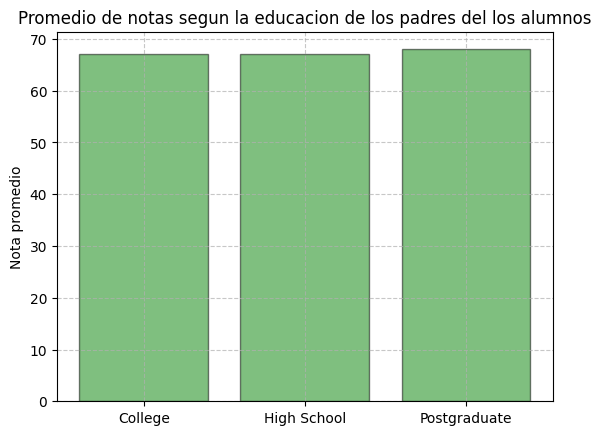

In [6]:
parental_education_level_mean_exam_score = (student_performance.groupby('Parental_Education_Level',as_index=False)['Exam_Score'].mean().round()).sort_values(by='Exam_Score')
plt.bar(parental_education_level_mean_exam_score['Parental_Education_Level'],parental_education_level_mean_exam_score['Exam_Score'],color='green',edgecolor='black',alpha=0.50)
plt.title('Promedio de notas segun la educacion de los padres del los alumnos')
plt.ylabel('Nota promedio')
plt.grid(linestyle='--',alpha=0.70)
plt.show()

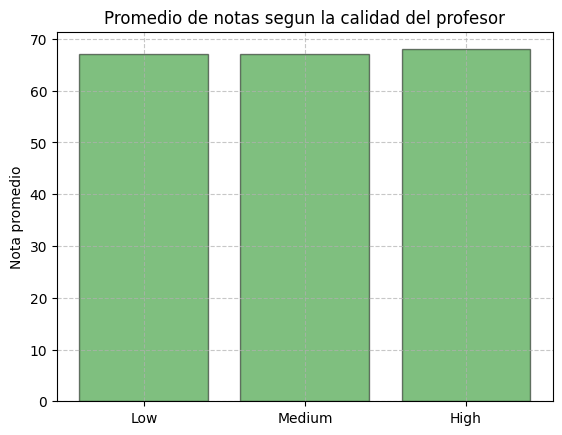

In [7]:
teacher_quality_mean_exam_score = (student_performance.groupby('Teacher_Quality',as_index=False)['Exam_Score'].mean().round()).sort_values(by='Exam_Score')
plt.bar(teacher_quality_mean_exam_score['Teacher_Quality'],teacher_quality_mean_exam_score['Exam_Score'],color='green',edgecolor='black',alpha=0.50)
plt.title('Promedio de notas segun la calidad del profesor')
plt.ylabel('Nota promedio')
plt.grid(linestyle='--',alpha=0.70)
plt.show()

En los graficos anteriores se puede observar que no hay una diferencia significativa entre la nota promedio y calidad del profesor, educacion que tienen los padres y distancia de la casa de los alumnos y la escuela.

Voy a imputar los nulos por los siguientes:

In [8]:
student_performance['Teacher_Quality'].fillna('Medium',inplace=True)
student_performance['Parental_Education_Level'].fillna('High School',inplace=True)
student_performance['Distance_from_Home'].fillna('Moderate',inplace=True)
student_performance['Exam_Score'].replace(101,100,inplace=True)

/tmp/ipykernel_9248/1023156031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_performance['Teacher_Quality'].fillna('Medium',inplace=True)
/tmp/ipykernel_9248/1023156031.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [9]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
student_performance.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235508
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.889161
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,100.000000


fff